# Instruções

1. Resolva todos os exercícios abaixo.
2. Salve uma cópia desse notebook em um repositório no GitHub.
3. Envie o link do repositório criado para o professor.
4. Envie um áudio curto ao professor explicando cada solução criada por você.

# 1. Adição de Imagens

No vídeo abaixo, eu mostro uma maneira de se fazer adição de imagens (inserir uma imagem menor dentro de uma imagem maior), podendo inclusive combinar esse efeito com a transparência.

<a href="https://www.youtube.com/watch?v=60k962jJAmE"><img src="https://img.youtube.com/vi/60k962jJAmE/mqdefault.jpg"/></a>

Dito isso, faça um algoritmo que receba uma imagem e insira uma marca d'água sobre essa figura. Considere a imagem abaixo como referência.

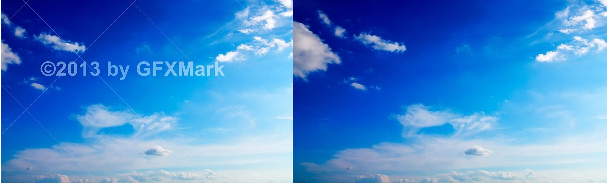

In [ ]:
import cv2
from matplotlib import pyplot as plt

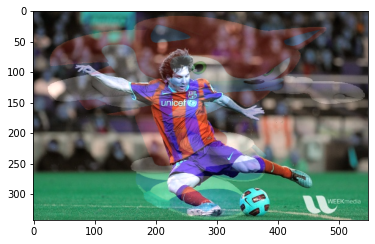

In [ ]:
img1 = cv2.imread("imagem.jpg")
img2 = cv2.imread("outra.png")
rows, lines, _ = img1.shape
img2 = cv2.resize(img2, (lines, rows))
res = cv2.addWeighted(img1, 1.0, img2, 0.25, 0.0)
plt.imshow(res)

#2. Rastreamento (Tracking)

Quando falamos do rastreamento de um objeto, estamos nos referindo a uma aplicação que "acompanha" o movimento de um objeto em um vídeo, marcando a posição dele tipicamente em caixas envolventes. Abaixo tem-se um exemplo:

<img src="https://i.pinimg.com/originals/41/36/f9/4136f909c378936cdf33f2cd975d081c.gif"/>

Nesse exercício, implemente o rastreio de um objeto com uma cor definida, nos moldes do exemplo do vídeo abaixo.

<a href="https://www.youtube.com/watch?v=M2wcIsMXPEA"><img src="https://img.youtube.com/vi/M2wcIsMXPEA/mqdefault.jpg"/></a>

In [ ]:
import numpy as np
import cv2

#abre a captura de vídeo. parâmetro 0 = webcam
cap = cv2.VideoCapture(0)

while (True):
    #lê cada quadro e carrega na variável frame
    _, frame = cap.read()

    # Transforma a imagem de RGB para HSV
    hsvImage = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    # Intervalo de vermelho mínimo e rosa máximo
    lowerRed = np.array([25, 50, 0])
    upperRed = np.array([50, 255, 255])

    # Identificação da área da embalagem
    mask = cv2.inRange(hsvImage, lowerRed, upperRed)
    
    result = cv2.bitwise_and(frame, frame, mask = mask)
    
    # Converte para tons de cinza
    gray = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
    # Converte pra preto e branco usando o método de Otsu
    # Parametros: imagem, valor do limiar, valor do pixel transformado, atribui o método de otsu
    _,gray = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

    contours, hierarchy = cv2.findContours(gray, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Existe algum contorno?    
    if contours:
        # Se sim, retorna a área em pixels de um determinado contorno
        maxArea = cv2.contourArea(contours[0])
        contourId = 0
        i = 0
        for cnt in contours:
            if maxArea < cv2.contourArea(cnt):
                maxArea = cv2.contourArea(cnt)
                contourId = i
            i += 1
        # Obtemos o contorno de maior área do conjunto de possíveis contornos
        cnt = contours[contourId]
        # Cria um retângulo que envolve o contorno em questão
        x,y,w,h = cv2.boundingRect(cnt)
        if(maxArea > 100.0):
            # Mostra retângulo vermelho com espessura 3
            cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255),3)     
    
    cv2.imshow('frame', frame)
    cv2.imshow('result', result)

    # Se o usuário precionar 'q', o programa fecha
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

#3. Proposta do Trabalho Final

Acesse o SIGAA e no fórum "Proposta de Trabalho Final", você deve elaborar o conceito do seu trabalho final.

Essa proposta deverá constar de:

* Tema (Reconhecimento de Faces? Diagnóstico de Doenças por Imagem? Verificação de Qualidade em Linha de Montagem por Imagem? Astronomia e Machine Learning?)
* Problema a ser Resolvido (Se seu protótipo der certo, qual solução ele trará a sociedade? Para qual finalidade ele será usado?)
* Método a ser usado (Qual algoritmo você implementará para resolver o problema apontado?)

